# A Cooling Coffee Cup with Polynomial Chaos Expansion



In [4]:
import os
import easyvvuq as uq
import chaospy as cp
import numpy as np
from pathlib import Path

# Set up a fresh campaign called "coffee_pce"
my_campaign = uq.Campaign(name="coffee_pce")

# Define parameter space
params = {
    "temp_init": {"type": "float", "min": 0.0, "max": 100.0, "default": 95.0},
    "kappa": {"type": "float", "min": 0.0, "max": 0.1, "default": 0.025},
    "t_env": {"type": "float", "min": 0.0, "max": 40.0, "default": 15.0},
    "out_file": {"type": "string", "default": "output.csv"},
}

# Create encoder and decoder
encoder = uq.encoders.GenericEncoder(
    template_fname="cooling.template", delimiter="$", target_filename="cooling_in.json"
)

decoder = uq.decoders.SimpleCSV(target_filename="output.csv", output_columns=["te"])

cwd = str(Path.cwd().resolve())
cmd = f"python {cwd}/cooling_model.py cooling_in.json"
actions = uq.actions.local_execute(encoder, cmd, decoder)

# Add the app (automatically set as current app)
my_campaign.add_app(name="cooling", params=params, actions=actions)

# Create the sampler
vary = {"kappa": cp.Uniform(0.025, 0.075), "t_env": cp.Uniform(15, 25)}
my_sampler = uq.sampling.PCESampler(vary=vary, polynomial_order=3)

# Associate the sampler with the campaign
my_campaign.set_sampler(my_sampler)

# Draw samples, run and collate
my_campaign.execute().collate()

# Post-processing analysis
results = my_campaign.analyse(qoi_cols=["te"])

# Get some descriptive statistics
mean = results.describe("te", "mean")
var = results.describe("te", "var")

print(f"{mean = }")
print(f"{var = }")

mean = array([95.        , 90.14480222, 85.62853232, 81.42607272, 77.51425404,
       73.87169698, 70.47867197, 67.31696485, 64.36975852, 61.62152061,
       59.05790055, 56.66563881, 54.43247737, 52.34708481, 50.39898016,
       48.57846789, 46.87657596, 45.28499994, 43.79605167, 42.40261031,
       41.09807879, 39.87634425, 38.7317402 , 37.65901235, 36.65328742,
       35.71004408, 34.82508628, 33.99451843, 33.21472289, 32.48233907,
       31.79424428, 31.14753593, 30.53951502, 29.96767121, 29.42966884,
       28.92333398, 28.44664273, 27.99771014, 27.57478008, 27.17621601,
       26.80049218, 26.44618579, 26.11196953, 25.79660476, 25.49893528,
       25.21788137, 24.95243443, 24.70165205, 24.46465327, 24.24061436,
       24.0287648 , 23.82838365, 23.63879613, 23.45937039, 23.28951465,
       23.12867447, 22.97633017, 22.83199453, 22.69521062, 22.56554974,
       22.44260959, 22.32601246, 22.21540368, 22.11045006, 22.0108385 ,
       21.91627469, 21.82648191, 21.74119985, 21.6601836 

<AxesSubplot: xlabel='Time', ylabel='First Order Sobol Index'>

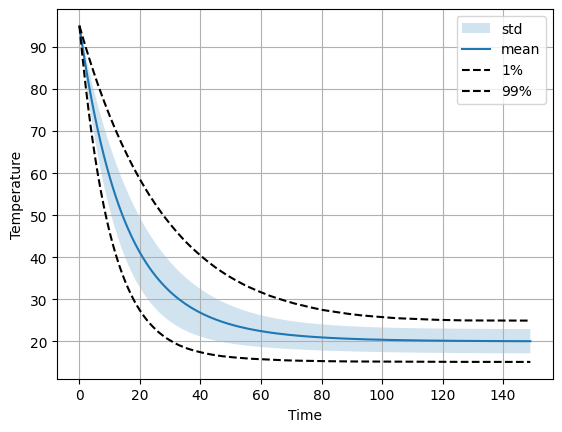

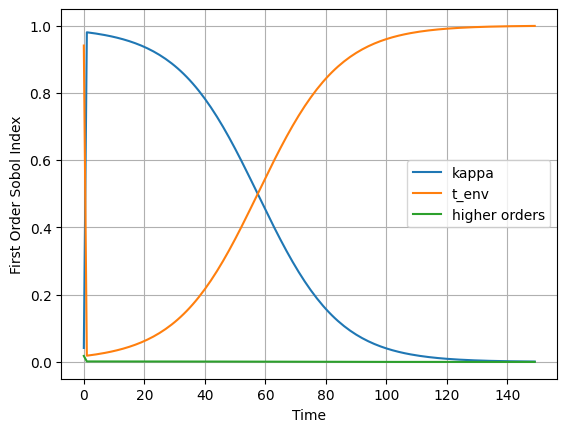

In [5]:
# Plots
# t = np.linspace(0, 200, 150)
results.plot_moments(qoi="te", ylabel="Temperature", xlabel="Time", alpha=0.2)
results.plot_sobols_first(qoi="te", xlabel="Time")
